In [1]:
library(devtools)
install_github("seoyeonc/gglite",force=TRUE)
library(gglite)
library(tidyverse)
library(patchwork)

Loading required package: usethis




── R CMD build ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/Rtmp6FRsEf/remotesfaeefdab6a5d/seoyeonc-gglite-1c0c2e5/DESCRIPTION’
─  preparing ‘gglite’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘gglite_0.1.0.tar.gz’
   



Attaching package: ‘gglite’


The following objects are masked from ‘package:stats’:

    density, line, smooth, step


The following object is masked from ‘package:graphics’:

    boxplot


The following objects are masked from ‘package:base’:

    col, jitter


Warning message:
“package ‘stringr’ was built under R version 4.3.2”
── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# 1. 비트시그널

$$y_t = \cos(62\pi t) + \cos(58\pi t)$$

In [2]:
t = 1:1000/2000
y1 = cos(62*pi*t) 
y2 = cos(58*pi*t)
am = 2*cos(2*pi*t)
y = y1 + y2 
fig1 = gglite() + line(t,y1,col=2) + line(t,y,alpha=0) + ylab("") + xlab("")
fig2 = gglite() + line(t,y2,col=4) + line(t,y,alpha=0) + ylab("") + xlab("")
fig3 = gglite() + line(t,y1+y2) + line(t,y1,col=2,alpha=0.5,lwd=0.2) + line(t,y2,col=4,alpha=0.5,lwd=0.2) + line(t,am,lty=2) + ylab("") + xlab("")
fig = fig1/fig2/fig3

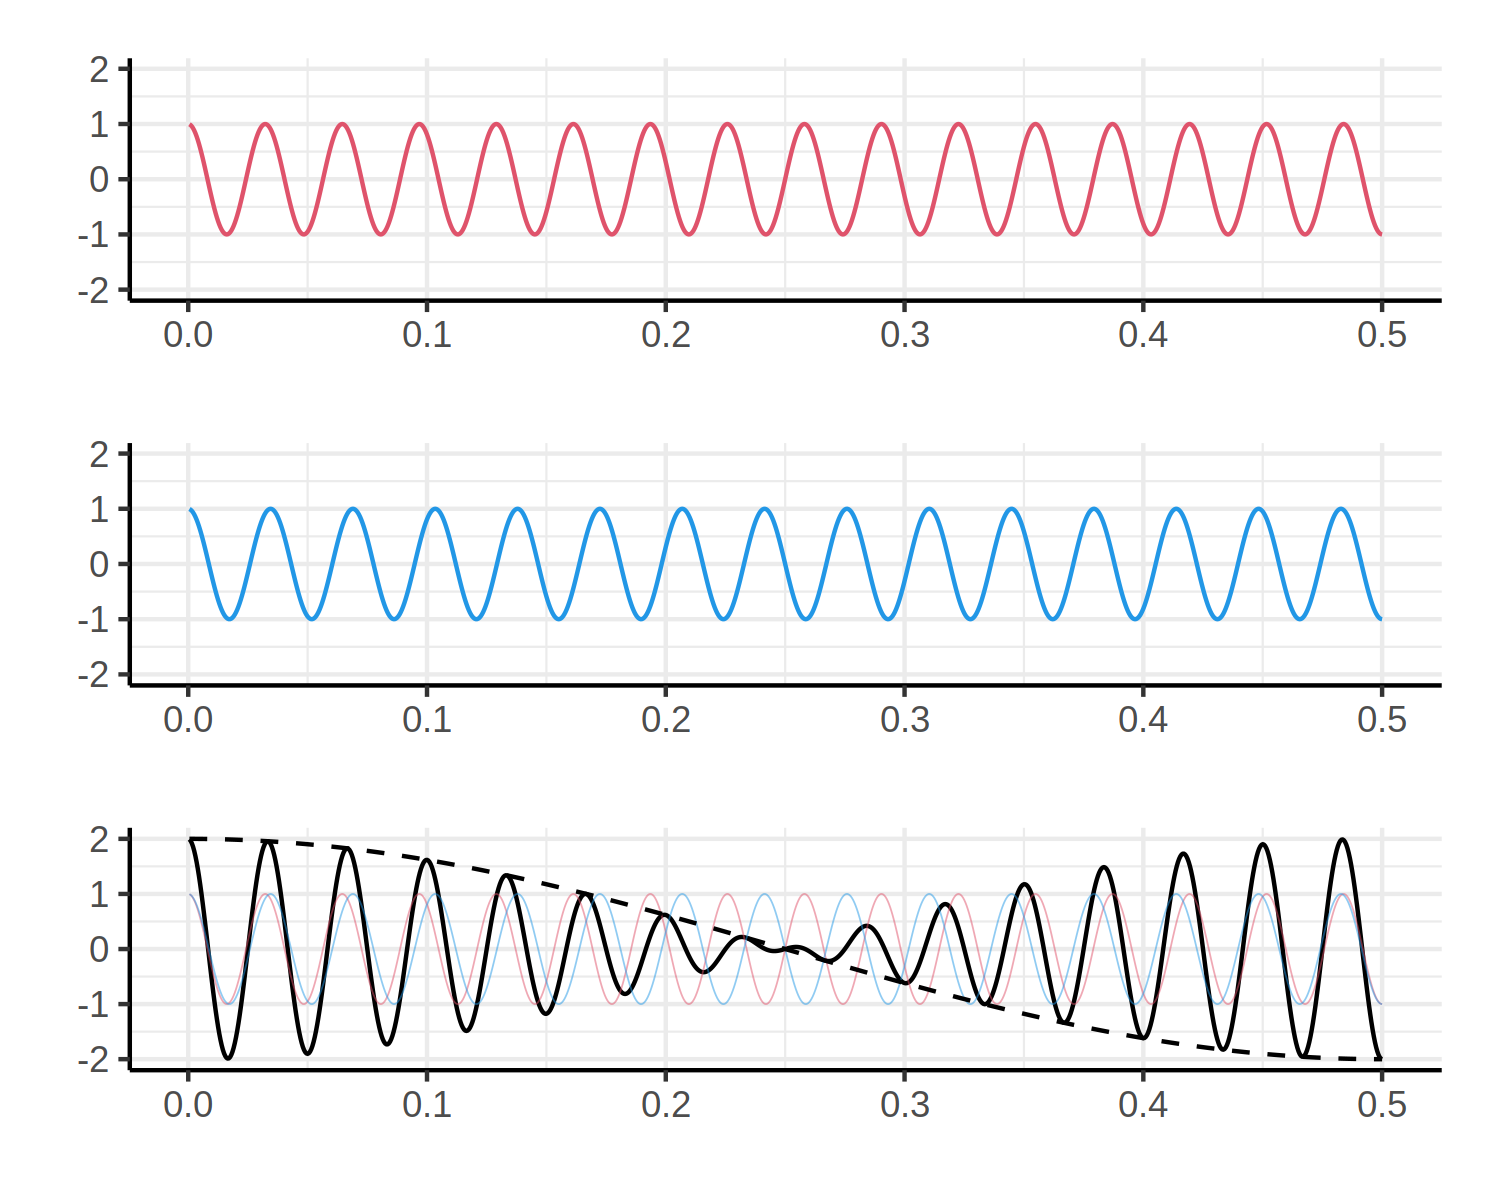

In [3]:
figsize(5,4)
fig = fig1/fig2/fig3
fig
figsize()

In [5]:
ggsave("beat.pdf",fig)

Saving 6.67 x 6.67 in image


# 2. 퓨리에변환 

In [86]:
spec <- function(y){
    n = length(y)
    spec = (abs(fft(y)))/n
    omega = 1:n/n 
    if(n%%2 ==0){
        m = (n/2)+1
    } else {
        m = (n-1)/2+1
    }
    spec = c(spec[(m+1):n],spec[1:m])
    omega = c(omega[(m+1):n]-1,omega[1:m]) -1/n
    list(freq=omega*2*pi,spec=spec)
}       

In [100]:
t = (1:40)/40
eps = rnorm(40)
const = -2+t*0
low = 9*sin(2*pi*t)
high = 4*cos(4*2*pi*t)
ytrue = const + low + high
y = ytrue + eps

In [101]:
freq = spec(y)$freq 
y_spec = spec(y)$spec 
const_spec = spec(const)$spec
low_spec = spec(low)$spec
high_spec = spec(high)$spec
eps_spec = spec(eps)$spec

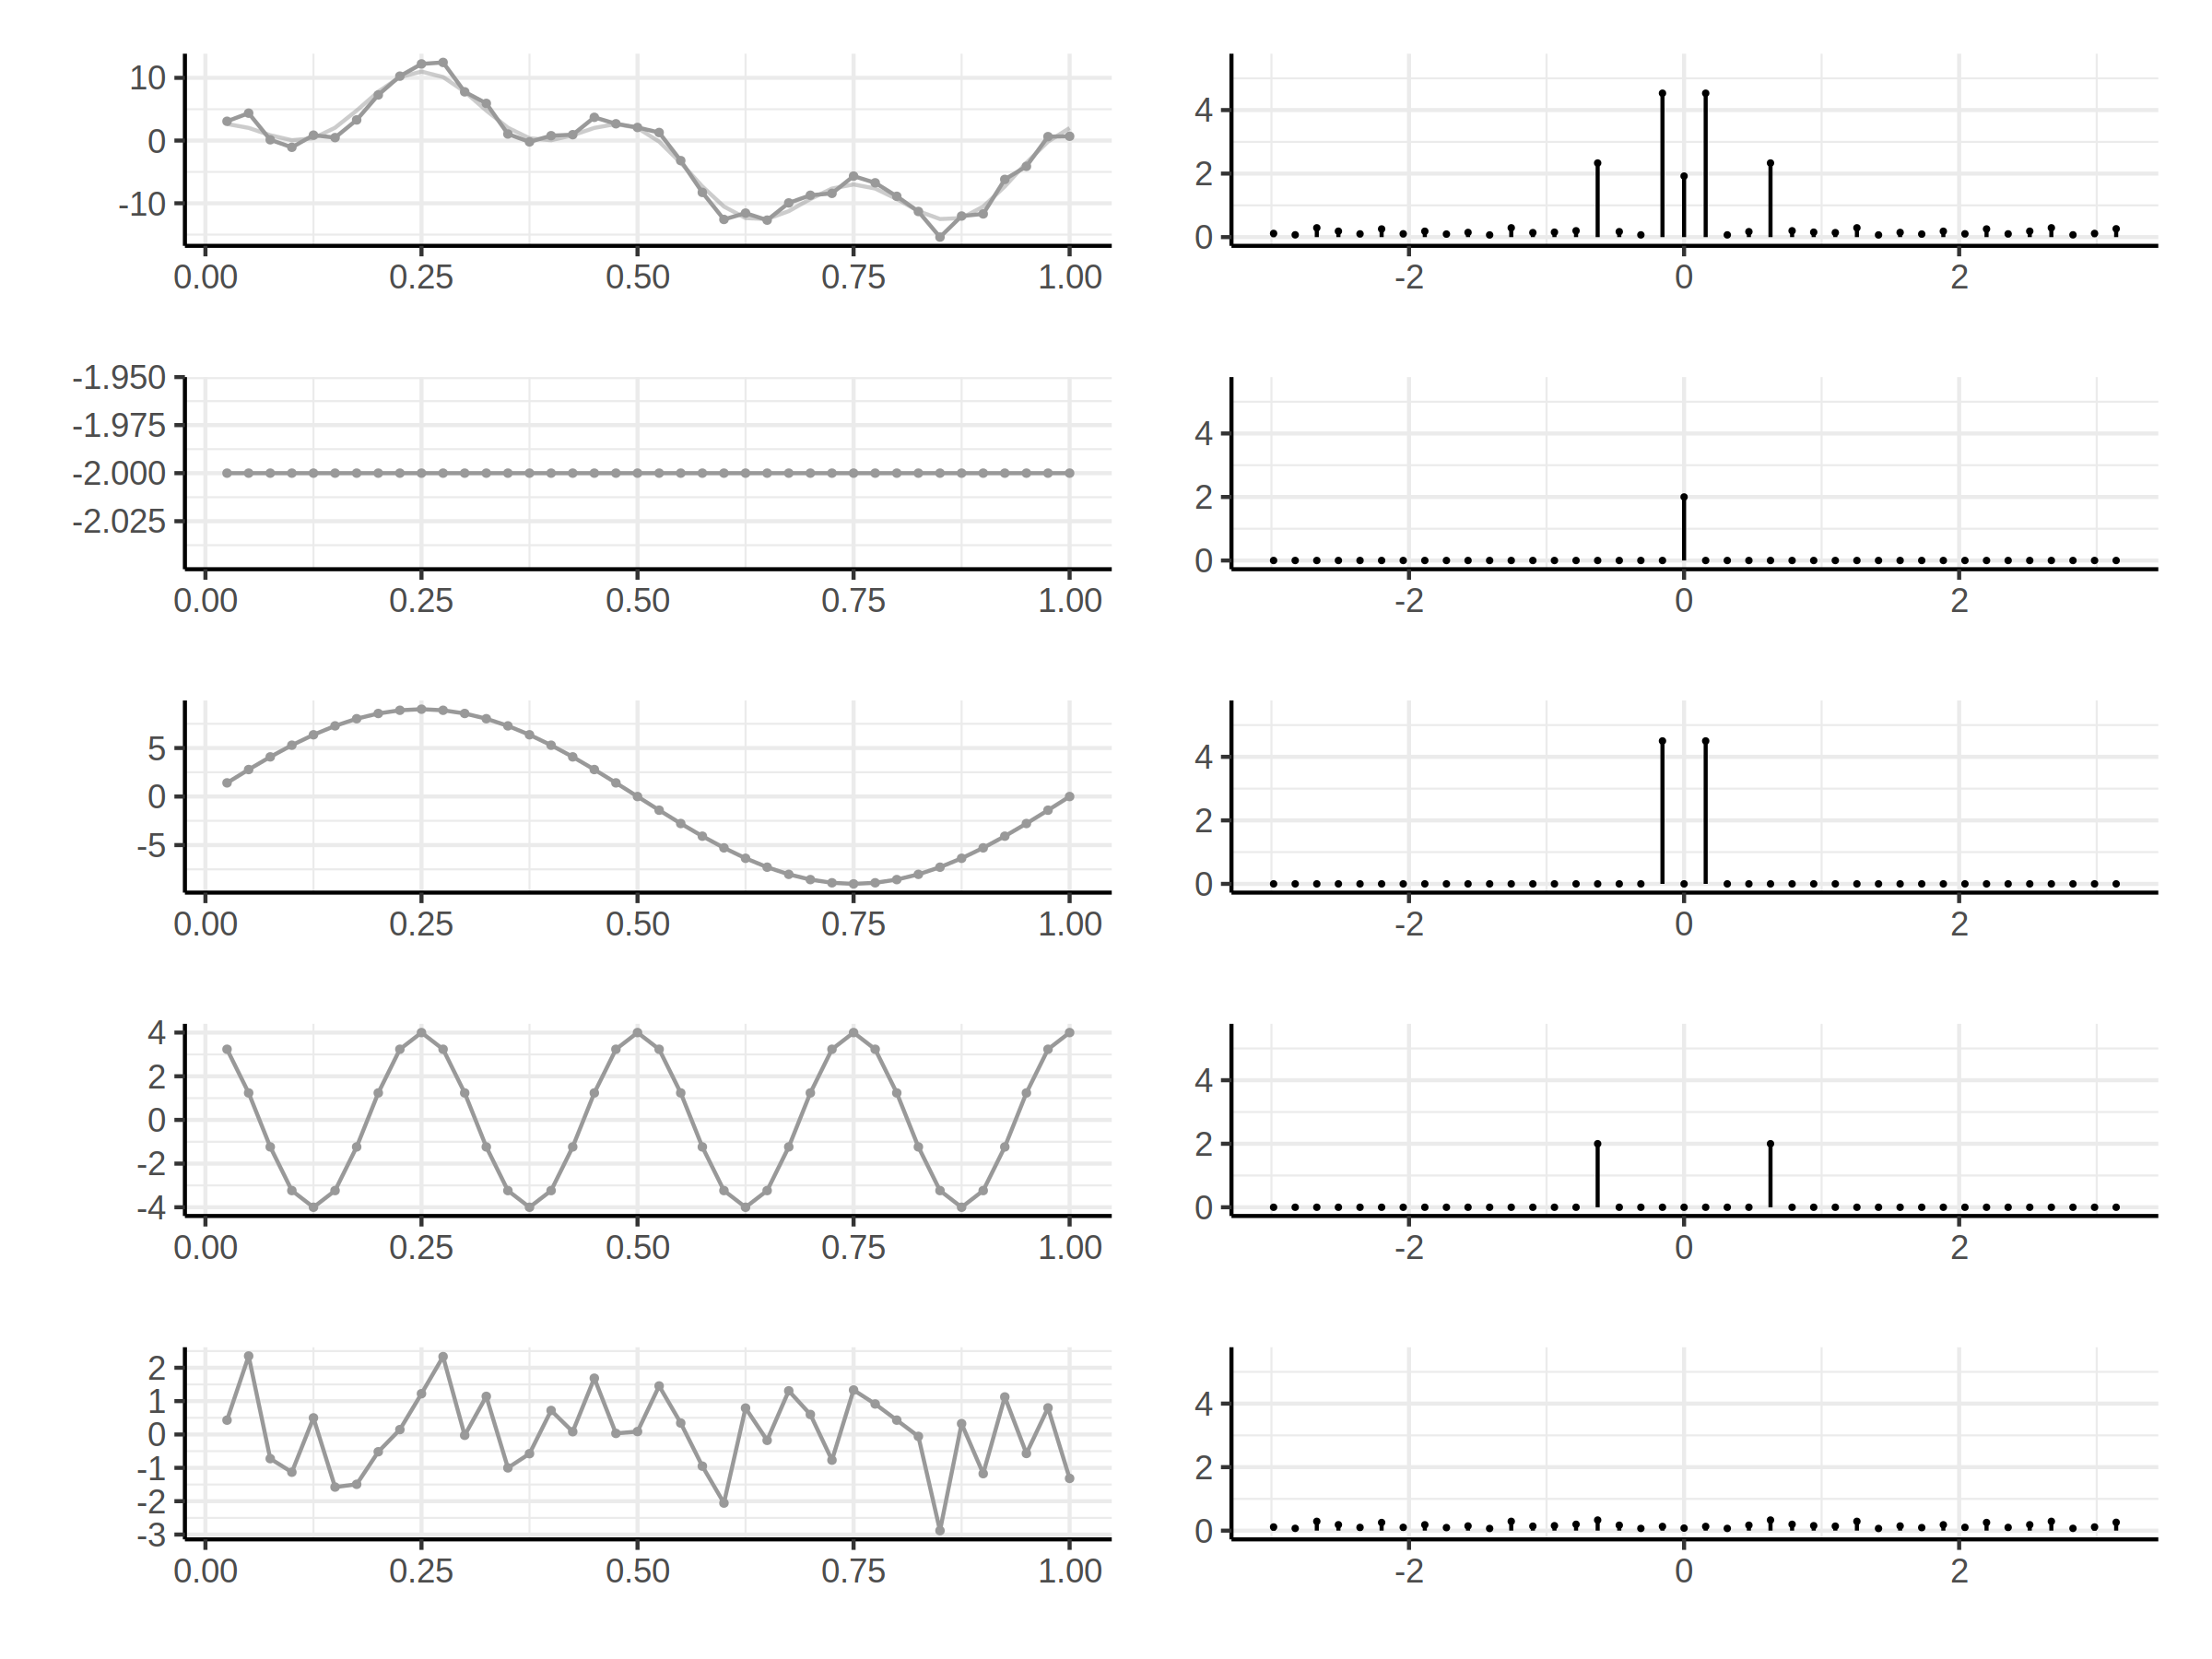

In [102]:
figsize(8,6)
a = gglite() + line(t,y,col="gray60",cex=0.5) + point(t,y,col="gray60",cex=0.5)+line(t,ytrue,col="gray60",alpha=0.5) + xlab("") + ylab("")
b = gglite() + point(freq,y_spec,cex=0.25) + ylim(0,5.5)+ xlab("") + ylab("") + geom_segment(aes(x=freq, xend = freq, y= y_spec, yend = 0))
c = gglite() + line(t,const,col="gray60")+ point(t,const,col="gray60",cex=0.5)+ xlab("") + ylab("")
d = gglite() + point(freq,const_spec,cex=0.25) + ylim(0,5.5)+ xlab("") + ylab("")+ geom_segment(aes(x=freq, xend = freq, y= const_spec, yend = 0))
e = gglite() + line(t,low,col="gray60")+ point(t,low,col="gray60",cex=0.5)+ xlab("") + ylab("")
f = gglite() + point(freq,low_spec,cex=0.25) + ylim(0,5.5)+ xlab("") + ylab("")+ geom_segment(aes(x=freq, xend = freq, y= low_spec, yend = 0))
g = gglite() + line(t,high,col="gray60")+ point(t,high,col="gray60",cex=0.5)+ xlab("") + ylab("")
h = gglite() + point(freq,high_spec,cex=0.25) + ylim(0,5.5)+ xlab("") + ylab("")+ geom_segment(aes(x=freq, xend = freq, y= high_spec, yend = 0))
i = gglite() + line(t,eps,col="gray60")+ point(t,eps,col="gray60",cex=0.5)+ xlab("") + ylab("")
j = gglite() + point(freq,eps_spec,cex=0.25) + ylim(0,5.5)+ xlab("") + ylab("")+ geom_segment(aes(x=freq, xend = freq, y= eps_spec, yend = 0))

(a|b) / (c|d) / (e|f) / (g|h) / (i|j)
figsize()